#블록맵

In [36]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')

from matplotlib import font_manager, rc
plt.rc('font', family='AppleGothic') # For MacOS
plt.rcParams['axes.unicode_minus'] = False #이걸로 해야 한글이 안깨임

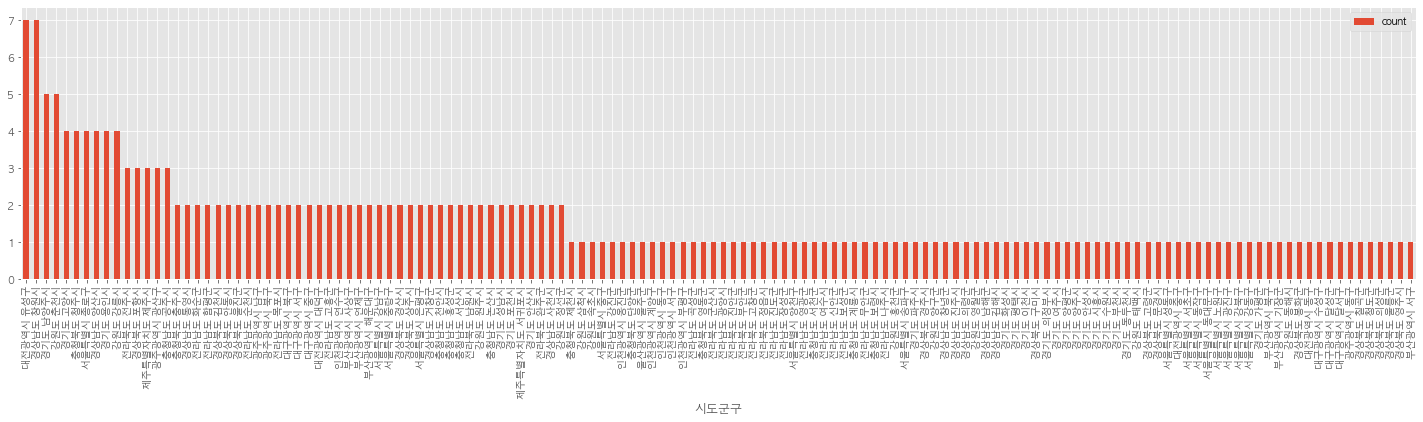

In [37]:
MC_ratio = local_MC_Population[['count']]
MC_ratio = MC_ratio.sort_values('count', ascending = False)
plt.rcParams["figure.figsize"] = (25,5)
MC_ratio.plot(kind='', rot=90)
plt.show()

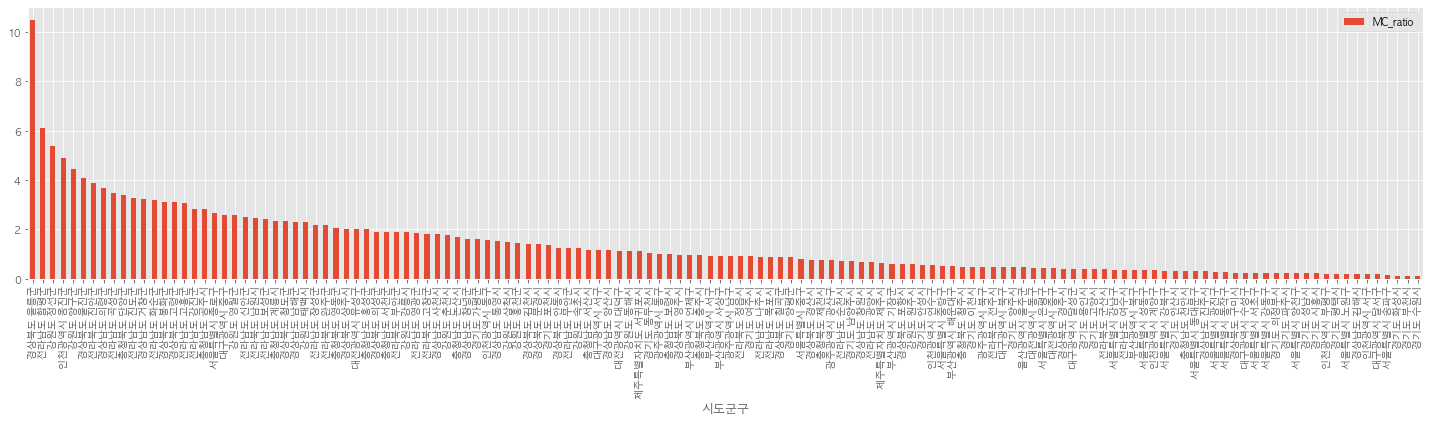

In [38]:
MC_ratio = local_MC_Population[['MC_ratio']]
MC_ratio = MC_ratio.sort_values('MC_ratio', ascending = False)
plt.rcParams["figure.figsize"] = (25,5)
MC_ratio.plot(kind='bar', rot=90)
plt.show()

In [39]:
import os
path = os.getcwd()

In [40]:
data_draw_korea = pd.read_csv('data_draw_korea1.csv', index_col=0, encoding='UTF-8', engine='python')

data_draw_korea.head()   #작업 확인용 출력

,인구수,shortName,x,y,면적,광역시도,행정구역,Count
0,202520,강릉,11,4,1040.07,강원도,강릉시,4
1,25589,고성(강원),9,0,664.19,강원도,고성군,0
2,86747,동해,11,5,180.01,강원도,동해시,4
3,63986,삼척,11,8,1185.80,강원도,삼척시,1
4,76733,속초,9,1,105.25,강원도,속초시,3


In [41]:
data_draw_korea['시도군구']= data_draw_korea.apply(lambda r: r['광역시도'] + ' ' + r['행정구역'], axis=1)

data_draw_korea.head()  #작업 확인용 출력

,인구수,shortName,x,y,면적,광역시도,행정구역,Count,시도군구
0,202520,강릉,11,4,1040.07,강원도,강릉시,4,강원도 강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군,0,강원도 고성군
2,86747,동해,11,5,180.01,강원도,동해시,4,강원도 동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시,1,강원도 삼척시
4,76733,속초,9,1,105.25,강원도,속초시,3,강원도 속초시


In [42]:
data_draw_korea = data_draw_korea.set_index("시도군구")

data_draw_korea.head()  #작업 확인용 출력

,인구수,shortName,x,y,면적,광역시도,행정구역,Count
시도군구,,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시,4
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군,0
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시,4
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시,1
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시,3


In [43]:
data_draw_korea_MC_Population_all = pd.merge(data_draw_korea,local_MC_Population,  how='outer',  left_index=True, right_index=True)

data_draw_korea_MC_Population_all.head()

,인구수_x,shortName,x,y,면적,광역시도,행정구역,Count,시도,군구,count,인구수_y,MC_ratio
시도군구,,,,,,,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시,4,강원도,강릉시,4.0,213328.0,1.875047
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군,0,NaN,NaN,NaN,NaN,NaN
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시,4,강원도,동해시,1.0,90417.0,1.105987
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시,1,강원도,삼척시,1.0,66806.0,1.496872
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시,3,강원도,속초시,1.0,81840.0,1.221896


In [44]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

In [45]:
def draw_blockMap(blockedMap, targetData, title, color ):
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 10))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
    
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
            dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
            if len(row['행정구역']) <= 2:
                dispname += row['행정구역'][-1]
        else:
            dispname = row['행정구역'][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 8.5, 1.5  #글씨 사이즈 / 줄 간격
        else:
            fontsize, linespacing = 10, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2) # 검정 선 굵기

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)
    plt.axis('off') #뒷배경 키고 끄기
    num_intervals = 5
    cb = plt.colorbar(shrink=.4, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    
    plt.savefig('.\\9장_data\\' + 'blockMap_' + targetData + '.png')
                      
    
    plt.show()      

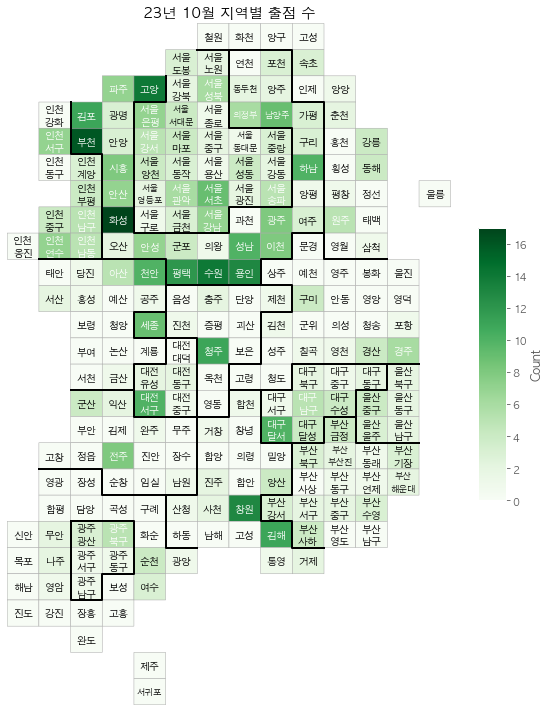

In [46]:
draw_blockMap(data_draw_korea_MC_Population_all, 'Count', '23년 10월 지역별 출점 수', 'Greens')
font_name = font_manager.FontProperties(fname="malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
draw_blockMap(data_draw_korea_MC_Population_all, 'Count', '23년 10월 지역별 출점 수', 'Greens')
font_name = font_manager.FontProperties(fname="malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False